In [21]:
from settings import *

In [22]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

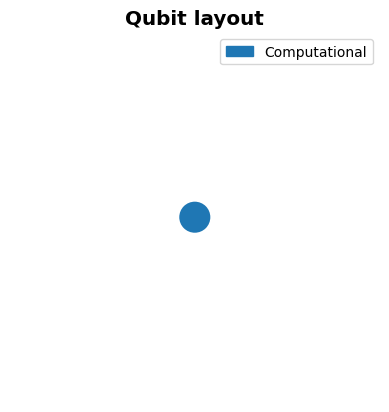

In [23]:
qubits.show_layout()

In [24]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=100)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=52940
Iteration: 0 
            Max gradient term: 0.07314458082857689 
            Current gradient: [ 0.          0.          0.          0.          0.         -0.03150493
  0.          0.          0.          0.          0.          0.
  0.          0.          0.06533495  0.          0.06533495  0.
  0.06456153  0.          0.          0.          0.02295004  0.
  0.02295004  0.          0.06952479  0.          0.          0.
  0.          0.          0.05987194  0.          0.          0.
  0.          0.          0.07314458  0.        ] 
            Current error: 0.27610755742271764 
            Current sigma values: (0, 1, 10)


C:\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 10 
            Max gradient term: 7.606282278655482e-05 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.46869799e-04 -5.96271945e-04  0.00000000e+00
 -5.96271945e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.60628228e-05  0.00000000e+00
  0.00000000e+00 -6.36365394e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.23873524e-04  0.00000000e+00
 -5.23873524e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00] 
            Current error: 8.347655253556263e-05 
            Current sigma values: (2, 0, 5.0)
Iteration: 20 
            Max gradient term: 2.926743134683881e-07 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00

In [25]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [26]:
theta_opt

array([0.87261294, 1.0441358 , 1.00155169, 1.        , 1.36669169,
       1.40848816, 1.00278067, 1.        , 1.10795821, 0.98436782,
       0.99667125, 1.        , 1.00030274, 1.06759936, 0.7086517 ,
       1.        , 0.78350146, 1.07034722, 0.49432443, 1.        ,
       0.97988069, 1.03172909, 0.7703371 , 1.        , 0.62313215,
       1.27067081, 0.3471237 , 1.        , 1.00107172, 0.8027289 ,
       0.81399197, 1.        , 0.37919382, 1.00776746, 1.07090531,
       1.        , 0.79855667, 0.98838687, 0.39099921, 1.        ])

In [27]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [28]:
ham = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)(theta_opt)
import qutip as qt
qt.Qobj(ham)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[-0.99901219+1.04374473e-05j -0.00318636+4.43225813e-02j]
 [ 0.00318636+4.43225813e-02j -0.99901219-1.04374473e-05j]]

In [29]:
ham.dot(ham.conj().T) # check if unitary

array([[1.00000000e+00+0.00000000e+00j, 4.43621372e-17+1.80411242e-16j],
       [4.43621372e-17-1.80411242e-16j, 1.00000000e+00+0.00000000e+00j]])

In [30]:
ham 
# ham / (ham[0,0] / np.abs(ham[0,0]))

array([[-0.99901219+1.04374473e-05j, -0.00318636+4.43225813e-02j],
       [ 0.00318636+4.43225813e-02j, -0.99901219-1.04374473e-05j]])

In [31]:
rhoaa = np.array([[1/2, -0.5j],[0.5j, 1/2]])
ham @ rhoaa @ np.conj(ham).T

array([[ 5.44278766e-01-1.08420217e-19j, -1.51654724e-04-4.98035509e-01j],
       [-1.51654724e-04+4.98035509e-01j,  4.55721234e-01+5.42101086e-20j]])

In [32]:
from q_channel_approx.physics_defns import create_hamiltonian
h = create_hamiltonian(system).full()
import scipy as sc
h_ = sc.linalg.expm((-1j) * 0.1 * h)

In [33]:
qt.Qobj(ham)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[-0.99901219+1.04374473e-05j -0.00318636+4.43225813e-02j]
 [ 0.00318636+4.43225813e-02j -0.99901219-1.04374473e-05j]]

In [34]:
h_

array([[0.99920011+0.j        , 0.        -0.03998933j],
       [0.        -0.03998933j, 0.99920011+0.j        ]])

In [35]:
h_ @ rhoaa @ np.conj(h_).T

array([[0.53995735+0.j        , 0.        -0.49840085j],
       [0.        +0.49840085j, 0.46004265+0.j        ]])

In [36]:
h

array([[0. +0.j, 0.4+0.j],
       [0.4+0.j, 0. +0.j]])

rho_rand_haar: seed=20764


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

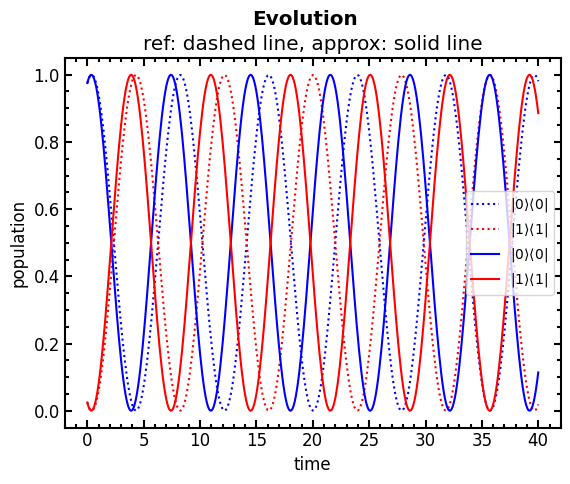

In [37]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(400, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=400, s=system, jump_opers=[])
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

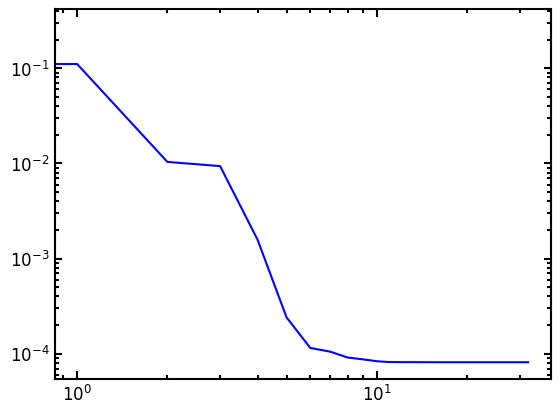

In [38]:
plt.loglog(errors)